In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x,y = make_classification(n_samples=100,n_features=2,n_informative=1,
                          n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

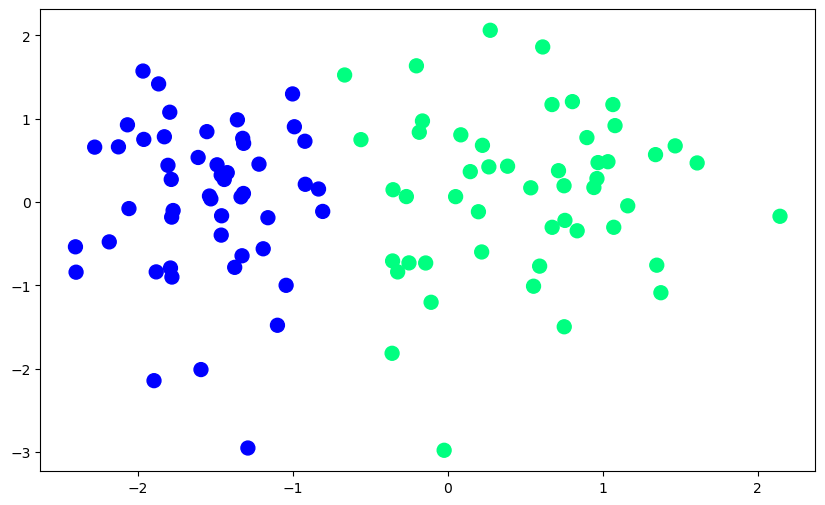

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1] , c=y,cmap='winter',s=100)

# First i will use sklearn 

In [9]:
from sklearn.linear_model import LogisticRegression

In [15]:
lor= LogisticRegression(penalty=None,solver='sag')

In [16]:
lor.fit(x,y)

/home/hamza/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [18]:
lor.coef_

array([[13.62407636,  1.00343679]])

In [19]:
lor.intercept_

array([9.03060828])

In [21]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [22]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input+b1

# Now i will implement my Own code using gradient

In [42]:
def gd(x,y):
    x = np.insert(x,0,1,axis=1) # in x matrix i insert columns of values zero it first place
    
    #step1 intilizing coffients W with 1
    weights = np.ones(x.shape[1])
    lr = 0.5  # learning rate

    #step 2 lop for epochs
    for i in range(5000):
        y_hat = sigmoid(np.dot(x,weights)) # y_hat = sigmoid(XW) its predication

        weights = (weights + (lr/x.shape[0])*(np.dot((y-y_hat),x))) # Using gradient descent w = w * (lr/m)*(y-y_hat)X

    return weights[1:],weights[0]
                        

In [43]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [44]:
coef_,intercept_ = gd(x,y)

In [45]:
m = -(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

In [46]:
x_input1 = np.linspace(-2,2,100)
y_input1 = m*x_input1+b

(-3.0, 2.0)

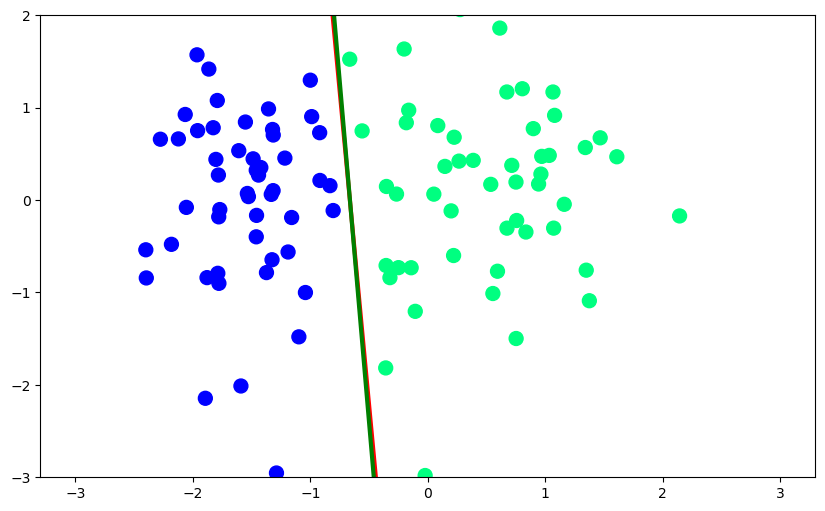

In [47]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='green',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)